# Supervised Learning Algorithms: Simple and Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Estimating Parameters using Ordinary Least Squares and Normal Equations

### Simple Linear Regression

In [3]:
x = [2, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
d = {'EngineSize':x, 'CO2emissions':y}
df = pd.DataFrame(data = d)

In [4]:
df

,EngineSize,CO2emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267


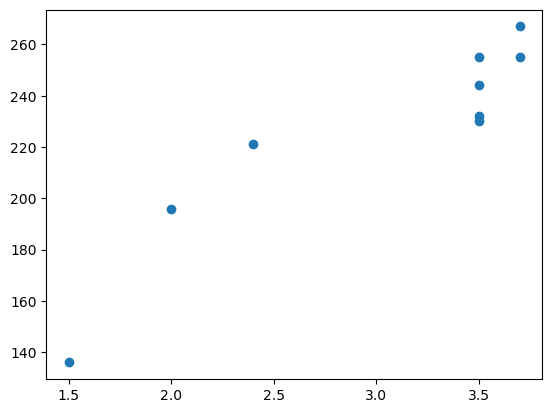

In [8]:
plt.scatter(x = df.EngineSize, y = df.CO2emissions)

In [13]:
## Computing the mean value of X and y
x_bar = np.mean(x)
y_bar = np.mean(y)

In [14]:
x_bar, y_bar

(3.033333333333333, 226.22222222222223)

In [21]:
## Computing theta_0 and theta_0 (the intercept and the slope of X)
theta_1 = np.sum( (x - x_bar) * (y - y_bar) ) / np.sum( (x - x_bar) ** 2 ) 
theta_0 = y_bar - (theta_0 * x_bar )

In [22]:
theta_0, theta_1

(92.80266825965751, 43.98446833930705)

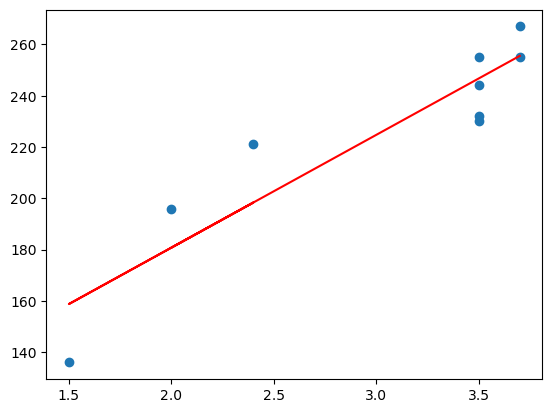

In [23]:
## Draw the Simple Linear Regression Line
X =  df.EngineSize
y_my_model = theta_1 * X + theta_0
plt.scatter(x = df.EngineSize, y = df.CO2emissions)
plt.plot(X, y_my_model, color  = "red")

In [24]:
## Compare your results with scikit-learn
LR_model = LinearRegression()

In [32]:
LR_model.fit(X = df.loc[:,"EngineSize"].values.reshape(-1,1), y = df.CO2emissions)

LinearRegression()

In [35]:
theta_0, theta_1

(92.80266825965751, 43.98446833930705)

In [34]:
LR_model.intercept_, LR_model.coef_

(92.80266825965754, array([43.98446834]))

### Multiple Linear Regression

In [ ]:
x1 = [2, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
x2 = [4, 4, 4, 6, 6, 6, 6, 6, 6]
x3 = [8.5, 9.6, 5.9, 11.1, 10.6, 10.0, 10.1, 11.1, 11.6]
y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
d = {'EngineSize':x1, 'Cylinders':x2, 'FuelConsumptionComb':x3, 'CO2emissions':y}
df = pd.DataFrame(data = d)

In [ ]:
df

In [ ]:
## TO-DO: Compute the coefficients using Least Squares and Normal Equations

## Estimating Parameters using Gradient Descent Optimization Algorithm

In [78]:
df2 = pd.read_csv("../datasets/random_linear_data.csv")

In [79]:
df2

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [83]:
X = df2.X
y = df2.y

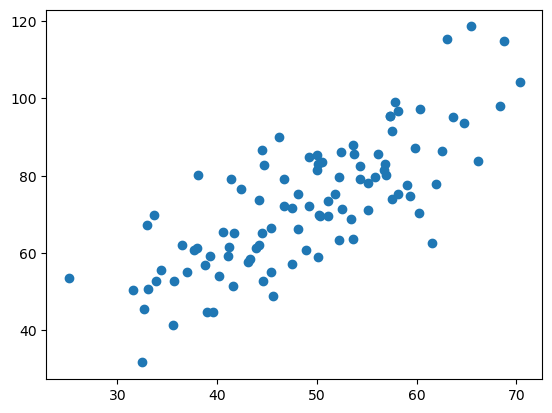

In [85]:
plt.scatter(df2.X, df2.y)

In [116]:
def gradient_descent(X, y, learning_rate, nbr_iterations):
    theta_0 = 0
    theta_1 = 0
    n = len(df2)
    for i in range(nbr_iterations):
        y_predictions = theta_0 + theta_1 * df2.X
        d_theta_0 =  (2/n) * sum(y_predictions - df2.y)
        d_theta_1 = (2/n) * sum( ( y_predictions - df2.y) * df2.X )
        
        #Plotting and Showing the polts
        #plt.scatter(df2.X, df2.y)
        #plt.plot([min(df2.X),max(df2.X)],[min(y_predictions),max(y_predictions)], color='red')
        plt.show()
        
        theta_0 = theta_0 - learning_rate * d_theta_0
        theta_1 = theta_1 - learning_rate * d_theta_1
        
        
    return theta_0, theta_1

In [117]:
t0,t1 = gradient_descent(df2.X, df2.y, 0.0001, 1000)

In [106]:
print("b = ",t0 , "\nm = ",t1)

b =  0.08893651993741357 
m =  1.4777440851894448


In [107]:
len(X)

100

In [108]:
LR_model = LinearRegression()
LR_model.fit(df2.X.values.reshape(-1,1), df2.y)

LinearRegression()

In [109]:
LR_model.intercept_, LR_model.coef_

(7.991020982270399, array([1.32243102]))

In [114]:
y_pred_sklearn = df2.X * LR_model.coef_[0] + LR_model.intercept_
y_pred_grad_desc = df2.X * t1 + t0

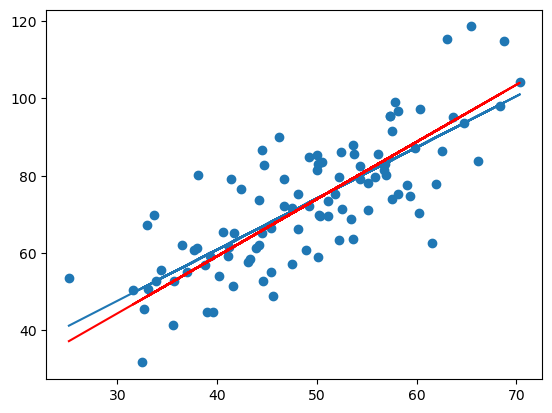

In [115]:
plt.scatter(df2.X, df2.y)
plt.plot(df2.X, y_pred_sklearn)
plt.plot(df2.X, y_pred_grad_desc, color = 'red')